# Analysis of my personal account watched hours

To add
- join with MyList
- heatmap
- gernes of movies and series 


I want to use data from my Netflix account to learn how to work with Python. My goal will be to analyze the time spent on Netflix and examine during which times of the day and in which months Netflix is most frequently used.

Wojciech Stala

Let's prepare the working environment.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Let's load the ViewingActivity file, which contains the user's activity on the platform, into a DataFrame. Then, let's display the DataFrame to take a look at the data.

In [11]:
Netflix_full_df = pd.read_csv('ViewingActivity.csv')
Netflix_full_df.head(20)


,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Pixar,2024-06-23 20:42:54,00:01:05,Autoplayed: user action: None;,New Amsterdam: Season 1_hook_primary_16x9,HOOK,Apple iPhone 15 Pro iPhone,00:01:05,00:01:05,PL (Poland)
1,Pixar,2024-06-23 20:38:12,00:00:15,Autoplayed: user action: None;,The Equalizer 2_hook_primary_16x9,HOOK,Apple iPhone 15 Pro iPhone,00:00:16,00:00:16,PL (Poland)
2,Pixar,2024-06-23 20:09:14,00:01:18,Autoplayed: user action: None;,The Equalizer - CLM 4,HOOK,Apple iPhone 15 Pro iPhone,00:00:06,00:00:06,PL (Poland)
3,Pixar,2024-06-13 18:07:10,01:56:14,NaN,Bez litości 2,NaN,Google Chromecast V5 Streaming Stick,01:56:14,01:56:14,PL (Poland)
4,Pixar,2024-06-13 18:05:31,00:00:46,Autoplayed: user action: None;,The Equalizer 2_hook_primary_16x9,HOOK,Apple iPhone 15 Pro iPhone,00:00:46,Not latest view,PL (Poland)
5,Pixar,2024-06-13 18:05:02,00:00:28,Autoplayed: user action: None;,The Equalizer - CLM 4,HOOK,Apple iPhone 15 Pro iPhone,00:00:28,Not latest view,PL (Poland)
6,Pixar,2024-06-13 18:01:45,00:00:45,Autoplayed: user action: None;,Sezon 2 (Klip): Krawiec,HOOK,Apple iPhone 15 Pro iPhone,00:00:45,00:00:45,PL (Poland)
7,Pixar,2024-06-13 17:56:39,00:01:05,Autoplayed: user action: None;,New Amsterdam: Season 1_hook_primary_16x9,HOOK,Apple iPhone 15 Pro iPhone,00:01:05,Not latest view,PL (Poland)
8,Pixar,2024-05-31 16:24:00,00:00:07,Autoplayed: user action: None;,Sezon 2 (Klip): Krawiec,HOOK,Apple iPhone 15 Pro iPhone,00:00:07,Not latest view,PL (Poland)
9,Pixar,2024-05-31 16:22:24,00:00:47,Autoplayed: user action: None;,Sezon 2 (Klip): Krawiec,HOOK,Apple iPhone 15 Pro iPhone,00:00:47,Not latest view,PL (Poland)


In [13]:
Netflix_full_df.describe()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
count,13998,13998,13998,5325,13998,716,13998,13998,13998,13998
unique,5,13989,3979,5,6601,4,20,4124,3088,2
top,Ziomeczki :),2022-10-23 18:15:51,00:00:01,Autoplayed: user action: None;,Władca Pierścieni: Drużyna Pierścienia,HOOK,TCL TV 2018 UHD Android TV Smart TV,00:00:04,Not latest view,PL (Poland)
freq,7742,2,426,2440,23,506,3752,217,5955,13992


Let's do data cleaning.

In [16]:
Netflix_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13998 entries, 0 to 13997
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             13998 non-null  object
 1   Start Time               13998 non-null  object
 2   Duration                 13998 non-null  object
 3   Attributes               5325 non-null   object
 4   Title                    13998 non-null  object
 5   Supplemental Video Type  716 non-null    object
 6   Device Type              13998 non-null  object
 7   Bookmark                 13998 non-null  object
 8   Latest Bookmark          13998 non-null  object
 9   Country                  13998 non-null  object
dtypes: object(10)
memory usage: 1.1+ MB


Let's start by removing the columns that we won't need. The columns 'Attributes', 'Bookmark', 'Latest Bookmark', and 'Country' have been removed because they won't be necessary for further analysis.

In [19]:
Netflix_full_df.drop(columns = ['Attributes','Bookmark','Latest Bookmark','Country'], inplace = True)
Netflix_full_df.head()

,Profile Name,Start Time,Duration,Title,Supplemental Video Type,Device Type
0,Pixar,2024-06-23 20:42:54,00:01:05,New Amsterdam: Season 1_hook_primary_16x9,HOOK,Apple iPhone 15 Pro iPhone
1,Pixar,2024-06-23 20:38:12,00:00:15,The Equalizer 2_hook_primary_16x9,HOOK,Apple iPhone 15 Pro iPhone
2,Pixar,2024-06-23 20:09:14,00:01:18,The Equalizer - CLM 4,HOOK,Apple iPhone 15 Pro iPhone
3,Pixar,2024-06-13 18:07:10,01:56:14,Bez litości 2,NaN,Google Chromecast V5 Streaming Stick
4,Pixar,2024-06-13 18:05:31,00:00:46,The Equalizer 2_hook_primary_16x9,HOOK,Apple iPhone 15 Pro iPhone


In [21]:
Netflix_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13998 entries, 0 to 13997
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             13998 non-null  object
 1   Start Time               13998 non-null  object
 2   Duration                 13998 non-null  object
 3   Title                    13998 non-null  object
 4   Supplemental Video Type  716 non-null    object
 5   Device Type              13998 non-null  object
dtypes: object(6)
memory usage: 656.3+ KB


Let's change the column names to shorter and more user-friendly ones to make them easier to use when writing code.

In [25]:
Netflix_full_df.rename(columns={'Supplemental Video Type':'Type','Profile Name':'Profile','Device Type':'Device'},inplace = True)

In [27]:
Netflix_full_df.head()

,Profile,Start Time,Duration,Title,Type,Device
0,Pixar,2024-06-23 20:42:54,00:01:05,New Amsterdam: Season 1_hook_primary_16x9,HOOK,Apple iPhone 15 Pro iPhone
1,Pixar,2024-06-23 20:38:12,00:00:15,The Equalizer 2_hook_primary_16x9,HOOK,Apple iPhone 15 Pro iPhone
2,Pixar,2024-06-23 20:09:14,00:01:18,The Equalizer - CLM 4,HOOK,Apple iPhone 15 Pro iPhone
3,Pixar,2024-06-13 18:07:10,01:56:14,Bez litości 2,NaN,Google Chromecast V5 Streaming Stick
4,Pixar,2024-06-13 18:05:31,00:00:46,The Equalizer 2_hook_primary_16x9,HOOK,Apple iPhone 15 Pro iPhone


The Type column contains categories for videos that are not movies or series, such as Trailers. From our perspective, I think we can divide them into two separate categories: Video (movies and series) and Trailer (all other usually short content).

In [30]:
Netflix_full_df['Type'].value_counts()

Type
HOOK              506
TRAILER           150
TEASER_TRAILER     52
RECAP               8
Name: count, dtype: int64

In [32]:
Netflix_full_df['Type'] = Netflix_full_df['Type'].fillna('Video')
Netflix_full_df['Type'] = Netflix_full_df['Type'].replace({'HOOK':'Trailer','TRAILER':'Trailer','TEASER_TRAILER':'Trailer','RECAP':'Trailer'})
Netflix_full_df.head()

,Profile,Start Time,Duration,Title,Type,Device
0,Pixar,2024-06-23 20:42:54,00:01:05,New Amsterdam: Season 1_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone
1,Pixar,2024-06-23 20:38:12,00:00:15,The Equalizer 2_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone
2,Pixar,2024-06-23 20:09:14,00:01:18,The Equalizer - CLM 4,Trailer,Apple iPhone 15 Pro iPhone
3,Pixar,2024-06-13 18:07:10,01:56:14,Bez litości 2,Video,Google Chromecast V5 Streaming Stick
4,Pixar,2024-06-13 18:05:31,00:00:46,The Equalizer 2_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone


Let's change the column types to match the data contained in each column.


In [36]:
Netflix_full_df[['Profile','Type','Device']] = Netflix_full_df[['Profile','Type','Device']].astype('category') 
Netflix_full_df['Title'] = Netflix_full_df['Title'].astype('string')
Netflix_full_df['Duration'] = pd.to_timedelta(Netflix_full_df['Duration'])
Netflix_full_df['Start Time'] = pd.to_datetime(Netflix_full_df['Start Time'])

Netflix_full_df.head()

,Profile,Start Time,Duration,Title,Type,Device
0,Pixar,2024-06-23 20:42:54,0 days 00:01:05,New Amsterdam: Season 1_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone
1,Pixar,2024-06-23 20:38:12,0 days 00:00:15,The Equalizer 2_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone
2,Pixar,2024-06-23 20:09:14,0 days 00:01:18,The Equalizer - CLM 4,Trailer,Apple iPhone 15 Pro iPhone
3,Pixar,2024-06-13 18:07:10,0 days 01:56:14,Bez litości 2,Video,Google Chromecast V5 Streaming Stick
4,Pixar,2024-06-13 18:05:31,0 days 00:00:46,The Equalizer 2_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone


Let's check the result of our work. All columns now have the appropriate type for the values they store. The data has been prepared and cleaned of unnecessary information.

In [39]:
Netflix_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13998 entries, 0 to 13997
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   Profile     13998 non-null  category       
 1   Start Time  13998 non-null  datetime64[ns] 
 2   Duration    13998 non-null  timedelta64[ns]
 3   Title       13998 non-null  string         
 4   Type        13998 non-null  category       
 5   Device      13998 non-null  category       
dtypes: category(3), datetime64[ns](1), string(1), timedelta64[ns](1)
memory usage: 370.2 KB


In [41]:
Netflix_full_df.head()

,Profile,Start Time,Duration,Title,Type,Device
0,Pixar,2024-06-23 20:42:54,0 days 00:01:05,New Amsterdam: Season 1_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone
1,Pixar,2024-06-23 20:38:12,0 days 00:00:15,The Equalizer 2_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone
2,Pixar,2024-06-23 20:09:14,0 days 00:01:18,The Equalizer - CLM 4,Trailer,Apple iPhone 15 Pro iPhone
3,Pixar,2024-06-13 18:07:10,0 days 01:56:14,Bez litości 2,Video,Google Chromecast V5 Streaming Stick
4,Pixar,2024-06-13 18:05:31,0 days 00:00:46,The Equalizer 2_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone


Now that the data is ready, we can start the data analysis. Let's check the total time spent on Netflix as well as the time spent per profile. We can notice that the profile "Ziomeczki" has the highest number of hours spent on Netflix.

In [44]:
Netflix_full_df['Duration'].sum()

Timedelta('251 days 21:24:31')

In [46]:
Netflix_full_df.groupby('Profile')['Duration'].sum()Time spent on a specific device.

C:\Users\stala\AppData\Local\Temp\ipykernel_31240\3499086614.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Netflix_full_df.groupby('Profile')['Duration'].sum()


Profile
Pixar            4 days 00:34:00
Rodzice          3 days 10:21:41
Wiktoria        61 days 07:06:47
Wojtuś          27 days 04:27:11
Ziomeczki :)   155 days 22:54:52
Name: Duration, dtype: timedelta64[ns]

Time spent on a specific device.

In [49]:
Netflix_full_df.groupby('Device')['Duration'].sum()

C:\Users\stala\AppData\Local\Temp\ipykernel_31240\3010132590.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Netflix_full_df.groupby('Device')['Duration'].sum()


Device
Android DefaultWidevineL3Phone Android Phone    0 days 00:01:12
Apple iPad Pro 11 inch 1st Gen Wi-Fi iPad      12 days 22:46:10
Apple iPad Pro 12.9 inch 3rd Gen Wi-Fi iPad     1 days 22:18:29
Apple iPhone 15 Pro iPhone                      0 days 02:04:49
Apple iPhone 15 iPhone                          0 days 01:30:42
Apple iPhone 8 (GSM)                            0 days 16:55:09
Apple iPhone X (GSM)                            0 days 01:21:04
Chrome PC (Cadmium)                             6 days 02:33:43
DefaultWidevineAndroidPhone                    20 days 23:03:42
DefaultWidevineAndroidTablets                   4 days 06:26:11
Google Chromecast V5 Streaming Stick           29 days 09:15:55
LG DTV 2022 LG O22 UHD TV Smart TV              0 days 02:04:13
Netflix Opera Other                             2 days 13:54:07
Samsung 2015 Hawk-M Smart TV                   50 days 03:02:36
Samsung 2018 Kant-S UHD TV Smart TV             0 days 03:05:08
Sony CE Sony Android TV 2021 M5 S

How often do you find yourself browsing trailers, unsure of what to choose? For me, it happens often, although looking at the data for the entire account, it only amounts to 4 hours. However, short content doesn't generate a large number of hours.

In [53]:
Netflix_full_df.groupby('Type')['Duration'].sum()

C:\Users\stala\AppData\Local\Temp\ipykernel_31240\3184503461.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Netflix_full_df.groupby('Type')['Duration'].sum()


Type
Trailer     0 days 03:53:27
Video     251 days 17:31:04
Name: Duration, dtype: timedelta64[ns]

Let's check if there is a correlation between the time spent on Netflix and the month of the year, day of the week, or year. Intuition would suggest that we spend the most time on Netflix during periods of worse weather, such as autumn or winter, while spring and summer would have significantly fewer hours. Similarly, when looking at the days of the week, I would expect more hours on weekends compared to weekdays. Let's see if these initial assumptions are supported by the data. Let's create new data frame containing columns representing Year,Month,Weekday and Time.

In [58]:
Netflix_daytime_split_df = Netflix_full_df
Netflix_daytime_split_df['Year'] = Netflix_daytime_split_df['Start Time'].dt.year
Netflix_daytime_split_df['Month'] = Netflix_daytime_split_df['Start Time'].dt.month_name()
Netflix_daytime_split_df['Weekday'] = Netflix_daytime_split_df['Start Time'].dt.day_name()
Netflix_daytime_split_df['Time'] = Netflix_daytime_split_df['Start Time'].dt.time
Netflix_daytime_split_df['Time'] = pd.to_datetime(Netflix_daytime_split_df['Time'], format='%H:%M:%S').dt.time
Netflix_daytime_split_df.head()

,Profile,Start Time,Duration,Title,Type,Device,Year,Month,Weekday,Time
0,Pixar,2024-06-23 20:42:54,0 days 00:01:05,New Amsterdam: Season 1_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Sunday,20:42:54
1,Pixar,2024-06-23 20:38:12,0 days 00:00:15,The Equalizer 2_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Sunday,20:38:12
2,Pixar,2024-06-23 20:09:14,0 days 00:01:18,The Equalizer - CLM 4,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Sunday,20:09:14
3,Pixar,2024-06-13 18:07:10,0 days 01:56:14,Bez litości 2,Video,Google Chromecast V5 Streaming Stick,2024,June,Thursday,18:07:10
4,Pixar,2024-06-13 18:05:31,0 days 00:00:46,The Equalizer 2_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Thursday,18:05:31


Let's create a simple function that will allow me to divide viewing hours into categories: morning, afternoon, evening, and night. Here as well, I would expect that a person with standard working hours (9-5) would record the most time on Netflix during the Evening and Night periods.

In [62]:
def categorize_time(row):
    hour = row.hour
    if hour >= 6 and hour < 12:
        return 'Morning'
    elif hour >= 12 and hour < 18:
        return 'Afternoon'
    elif hour >= 18 and hour < 24:
        return 'Evening'
    else:
        return 'Night'

In [64]:
Netflix_daytime_split_df['Time'] = Netflix_daytime_split_df['Time'].apply(categorize_time) 
Netflix_daytime_split_df.head()

,Profile,Start Time,Duration,Title,Type,Device,Year,Month,Weekday,Time
0,Pixar,2024-06-23 20:42:54,0 days 00:01:05,New Amsterdam: Season 1_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Sunday,Evening
1,Pixar,2024-06-23 20:38:12,0 days 00:00:15,The Equalizer 2_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Sunday,Evening
2,Pixar,2024-06-23 20:09:14,0 days 00:01:18,The Equalizer - CLM 4,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Sunday,Evening
3,Pixar,2024-06-13 18:07:10,0 days 01:56:14,Bez litości 2,Video,Google Chromecast V5 Streaming Stick,2024,June,Thursday,Evening
4,Pixar,2024-06-13 18:05:31,0 days 00:00:46,The Equalizer 2_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Thursday,Evening


Let's check totals.

In [54]:
Netflix_daytime_split_df['Time'].value_counts()

Time
Evening      6430
Afternoon    4903
Morning      2232
Night         433
Name: count, dtype: int64

Let's take a look at how this breaks down in terms of time spent. It’s clear that in some cases, the assumptions hold true. However, for the "Ziomeczki" and "Rodzice" accounts, Afternoon is the most frequently used time slot.

In [68]:
Time_duration_df = Netflix_daytime_split_df.groupby(['Time','Profile'])['Duration'].sum().unstack()
Time_duration_df.head()

C:\Users\stala\AppData\Local\Temp\ipykernel_31240\2451363501.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Time_duration_df = Netflix_daytime_split_df.groupby(['Time','Profile'])['Duration'].sum().unstack()


Profile,Pixar,Rodzice,Wiktoria,Wojtuś,Ziomeczki :)
Time,,,,,
Afternoon,0 days 21:14:58,1 days 19:19:03,14 days 12:57:37,9 days 18:46:27,59 days 08:54:49
Evening,2 days 09:24:28,1 days 07:18:55,39 days 03:46:07,13 days 19:52:30,58 days 09:46:05
Morning,0 days 05:46:12,0 days 04:36:59,7 days 06:15:08,3 days 11:07:59,31 days 05:48:22
Night,0 days 12:08:22,0 days 03:06:44,0 days 08:07:55,0 days 02:40:15,6 days 22:25:36


In [59]:
Time_duration_df = Time_duration_df.apply(pd.to_timedelta).apply(lambda x: x.dt.total_seconds() / 3600)
Time_duration_df = Time_duration_df.round(2)
Time_duration_df.head()

Profile,Pixar,Rodzice,Wiktoria,Wojtuś,Ziomeczki :)
Time,,,,,
Afternoon,21.25,43.32,348.96,234.77,1424.91
Evening,57.41,31.32,939.77,331.88,1401.77
Morning,5.77,4.62,174.25,83.13,749.81
Night,12.14,3.11,8.13,2.67,166.43


It’s also evident that individual user preferences influence their time spent on Netflix. Each user seems to have a different viewing pattern. The only consistent feature across all users appears to be the time spent during the night, which is always the shortest period. Let's try few different plots to present results.

<Axes: xlabel='Time'>

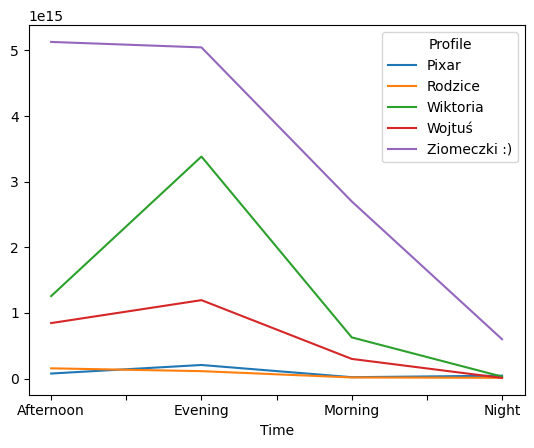

In [71]:
Time_duration_df.plot()

<Axes: xlabel='Time'>

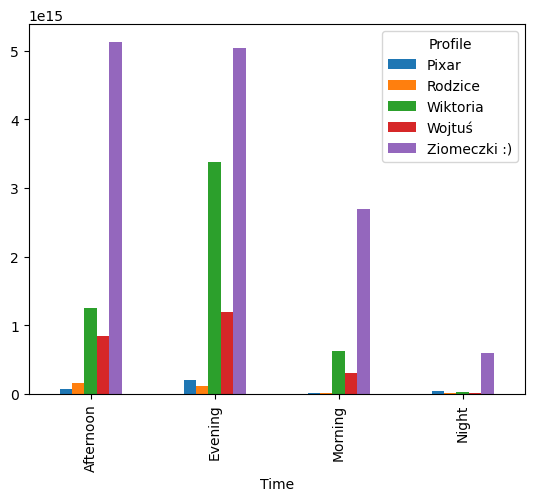

In [74]:
Time_duration_df.plot(kind = 'bar')

Let’s now examine our data from the perspective of months. Are there months when we use platforms like Netflix more frequently? Based on our initial assumption, we suspect that the spring and summer months should have fewer hours due to better weather outside. On the other hand, unpleasant weather in autumn and winter should encourage increased viewership.

Let’s check if the data supports this hypothesis!

In [77]:
Netflix_daytime_split_df.head()

,Profile,Start Time,Duration,Title,Type,Device,Year,Month,Weekday,Time
0,Pixar,2024-06-23 20:42:54,0 days 00:01:05,New Amsterdam: Season 1_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Sunday,Evening
1,Pixar,2024-06-23 20:38:12,0 days 00:00:15,The Equalizer 2_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Sunday,Evening
2,Pixar,2024-06-23 20:09:14,0 days 00:01:18,The Equalizer - CLM 4,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Sunday,Evening
3,Pixar,2024-06-13 18:07:10,0 days 01:56:14,Bez litości 2,Video,Google Chromecast V5 Streaming Stick,2024,June,Thursday,Evening
4,Pixar,2024-06-13 18:05:31,0 days 00:00:46,The Equalizer 2_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Thursday,Evening


In [79]:
Netflix_daytime_split_df['Hours'] = Netflix_daytime_split_df['Duration'].dt.total_seconds() / 3600
Month_duration_df = Netflix_daytime_split_df.groupby(['Month','Profile'])['Hours'].sum().unstack()
Month_duration_df = Month_duration_df.round(2)
Month_duration_df.head()

C:\Users\stala\AppData\Local\Temp\ipykernel_31240\2969286726.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Month_duration_df = Netflix_daytime_split_df.groupby(['Month','Profile'])['Hours'].sum().unstack()


Profile,Pixar,Rodzice,Wiktoria,Wojtuś,Ziomeczki :)
Month,,,,,
April,1.14,23.14,160.29,59.98,333.57
August,4.58,0.69,142.78,81.43,265.22
December,3.48,6.68,95.70,51.10,360.70
February,0.00,7.97,94.43,42.90,250.86
January,21.27,19.13,100.76,57.05,460.86


In [81]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Month_duration_df.index = pd.CategoricalIndex(Month_duration_df.index, categories=month_order, ordered=True)
Month_duration_df = Month_duration_df.sort_index()
Month_duration_df.head()

Profile,Pixar,Rodzice,Wiktoria,Wojtuś,Ziomeczki :)
Month,,,,,
January,21.27,19.13,100.76,57.05,460.86
February,0.00,7.97,94.43,42.90,250.86
March,44.84,3.32,182.72,77.28,315.88
April,1.14,23.14,160.29,59.98,333.57
May,1.99,3.31,88.20,27.20,301.92


The DataFrame itself isn’t very readable. Let’s use a bar chart to see if we can identify any patterns in the hours spent on Netflix. Interestingly, the user Wiktoria shows an increase in March/April compared to the winter months, which might be somewhat surprising. Then, there’s a drop in viewership, likely due to better weather. What’s even more interesting is that in August/September, there’s a significant increase in viewership, even though these months are typically associated with pleasant weather.

I think similar trends can be observed for the user Wojtus, who shows strong increases in March and August compared to the preceding months. For the user Ziomeczki, it’s harder to spot a clear pattern, although they also show increases in March/April. However, consistent with the theory, colder months like December and January seem to favor more time spent on Netflix, while May and June are characterized by declines. That said, there are many month-to-month fluctuations that drastically change the trends.

<Axes: xlabel='Month'>

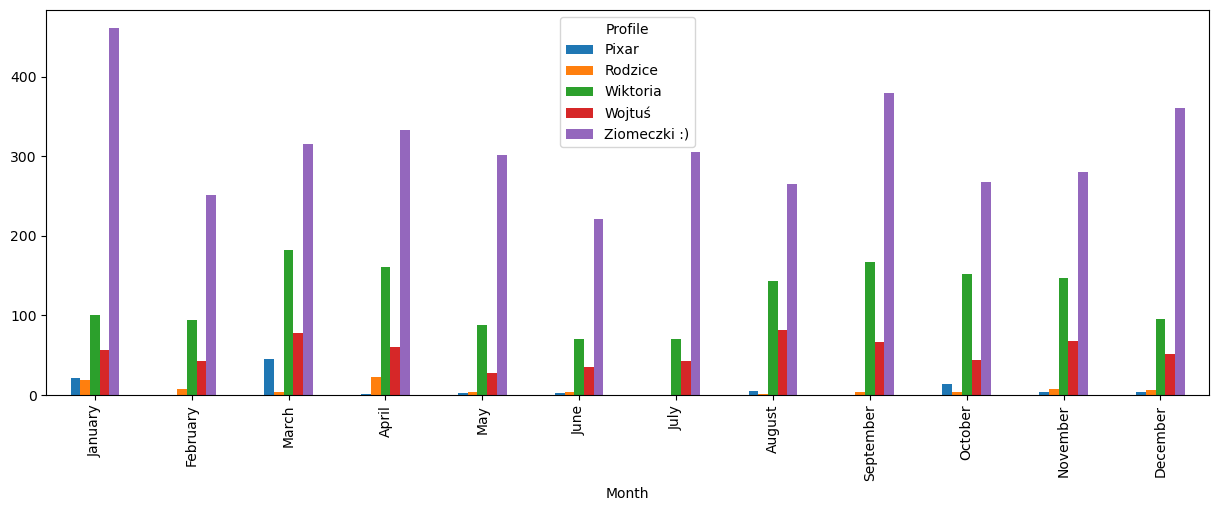

In [74]:
Month_duration_df.plot(kind = 'bar', figsize = (15,5))

However, it’s important to note that the data above includes the cumulative time spent over the years. The account has been active since 2019. Let’s see if user trends become more apparent when analyzing the data year by year.

In [85]:
Netflix_daytime_split_df.head()
DF = Netflix_daytime_split_df[Netflix_daytime_split_df['Profile']  == 'Wiktoria' ].groupby(['Year','Month'])['Hours'].sum()
DF = DF.loc[2024]
DF.head(20)

Month
August       24.962222
February      0.044722
January       0.227500
July         25.094444
March        12.365833
May           3.725000
November      8.849722
October      30.591111
September    53.522222
Name: Hours, dtype: float64

In [87]:
def Create_line_plot_hours_spend_monthly(year,profile):
    DF = Netflix_daytime_split_df[Netflix_daytime_split_df['Profile']  == profile ].groupby(['Year','Month'])['Hours'].sum()
    DF = DF.loc[year]
    DF = DF.reindex(month_order, fill_value=0)
    DF.index = pd.CategoricalIndex(Month_duration_df.index, categories=month_order, ordered=True)
    DF.name = year
    DF = DF.reindex(month_order, fill_value=0)
    DF.plot(kind = 'line' ,figsize = (15,5), legend = True)

For the user Wiktoria, a certain pattern is visible. Viewership increases during the spring months, then drops during the summer, rises again in the autumn, and finally falls during the winter.

Text(0.5, 1.0, 'Hours spent monthly each year for user Wiktoria')

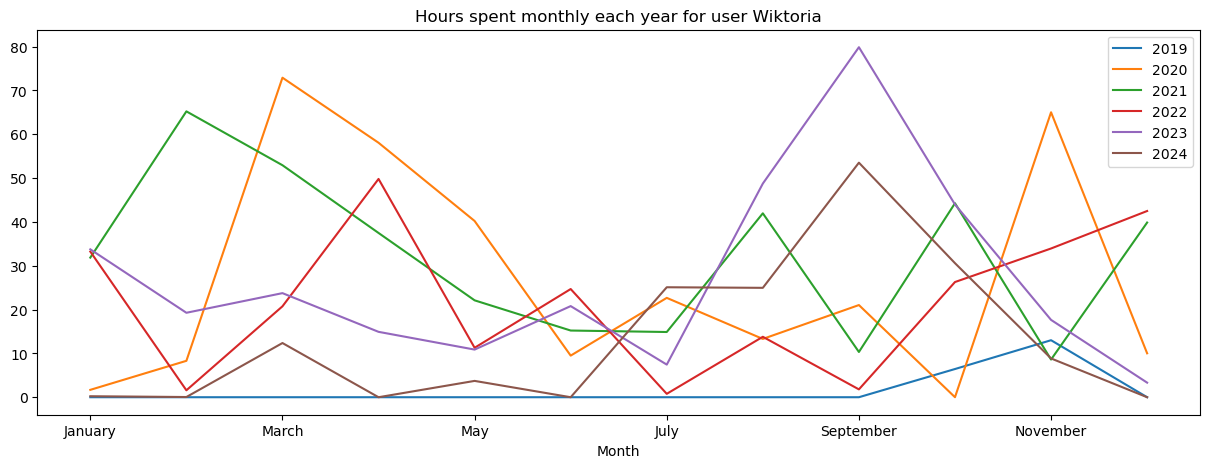

In [89]:
Create_line_plot_hours_spend_monthly(year = 2019,profile = 'Wiktoria')
Create_line_plot_hours_spend_monthly(year = 2020,profile = 'Wiktoria')
Create_line_plot_hours_spend_monthly(year = 2021,profile = 'Wiktoria')
Create_line_plot_hours_spend_monthly(year = 2022,profile = 'Wiktoria')
Create_line_plot_hours_spend_monthly(year = 2023,profile = 'Wiktoria')
Create_line_plot_hours_spend_monthly(year = 2024,profile = 'Wiktoria')
plt.title('Hours spent monthly each year for user Wiktoria')






For the user Ziomeczki, it’s difficult to spot clear changes over the years.

Text(0.5, 1.0, 'Hours spent monthly each year for user Ziomeczki')

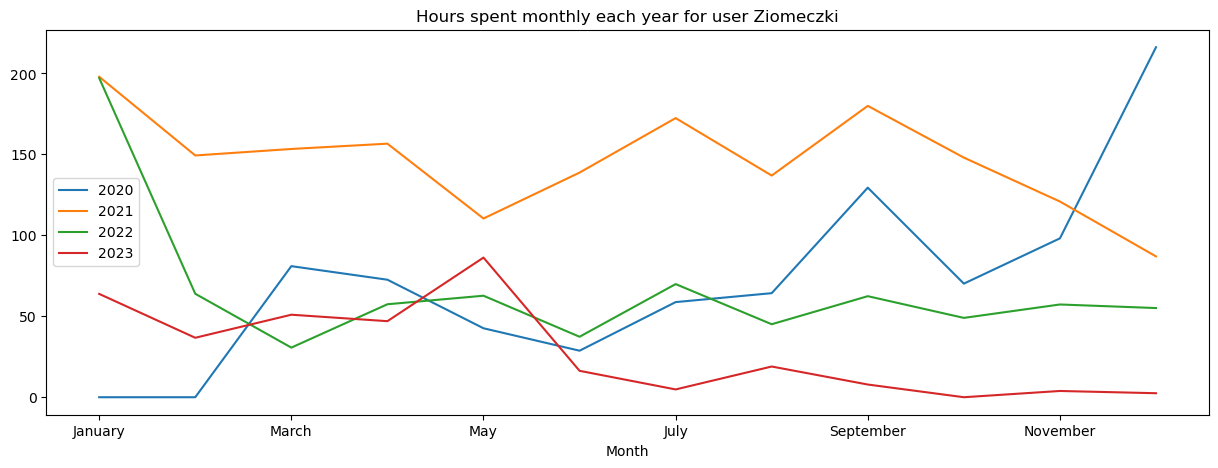

In [93]:
Create_line_plot_hours_spend_monthly(year = 2020,profile = 'Ziomeczki :)')
Create_line_plot_hours_spend_monthly(year = 2021,profile = 'Ziomeczki :)')
Create_line_plot_hours_spend_monthly(year = 2022,profile = 'Ziomeczki :)')
Create_line_plot_hours_spend_monthly(year = 2023,profile = 'Ziomeczki :)')
plt.title('Hours spent monthly each year for user Ziomeczki')

The user Wojtuś seems to have peak viewing periods in early spring and late summer/early autumn, where significant spikes in viewership are noticeable.

Text(0.5, 1.0, 'Hours spent monthly each year for user Wojtuś')

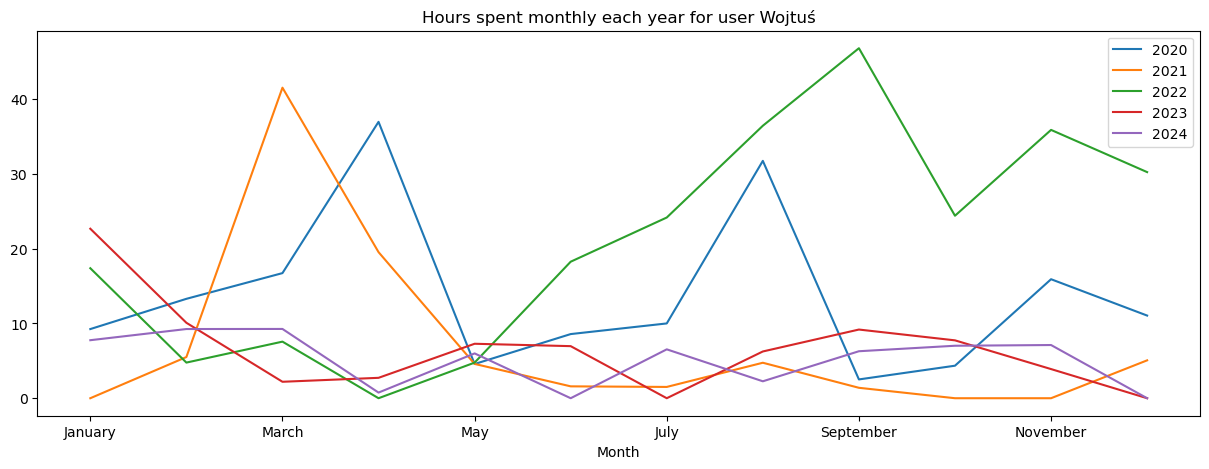

In [95]:
Create_line_plot_hours_spend_monthly(year = 2020,profile = 'Wojtuś')
Create_line_plot_hours_spend_monthly(year = 2021,profile = 'Wojtuś')
Create_line_plot_hours_spend_monthly(year = 2022,profile = 'Wojtuś')
Create_line_plot_hours_spend_monthly(year = 2023,profile = 'Wojtuś')
Create_line_plot_hours_spend_monthly(year = 2024,profile = 'Wojtuś')
plt.title('Hours spent monthly each year for user Wojtuś')

In [98]:
Day_duration_df = Netflix_daytime_split_df.groupby(['Weekday','Profile'])['Hours'].sum().unstack()
Day_duration_df = Day_duration_df.round(2)
Day_duration_df.head()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Day_duration_df.index = pd.CategoricalIndex(Day_duration_df.index, categories=day_order, ordered=True)
Day_duration_df = Day_duration_df.sort_index()
Day_duration_df.head()

C:\Users\stala\AppData\Local\Temp\ipykernel_31240\384895095.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Day_duration_df = Netflix_daytime_split_df.groupby(['Weekday','Profile'])['Hours'].sum().unstack()


Profile,Pixar,Rodzice,Wiktoria,Wojtuś,Ziomeczki :)
Weekday,,,,,
Monday,9.69,9.22,229.19,48.55,441.73
Tuesday,9.18,15.37,237.76,75.80,399.99
Wednesday,1.57,11.12,191.72,85.01,418.11
Thursday,15.91,13.02,190.91,88.79,400.13
Friday,10.09,10.20,186.65,107.02,398.89


Let’s take a look at the total time spent each day. It seems that, as expected, more Netflix was watched on weekend days.

<Axes: xlabel='Weekday'>

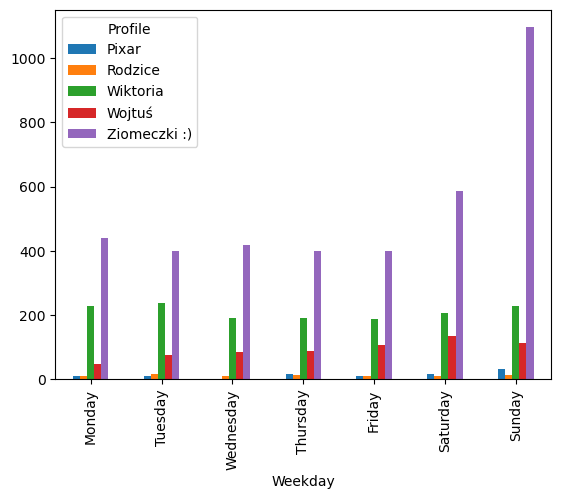

In [101]:
Day_duration_df.plot(kind = 'bar')

In [103]:
Day_duration_without_Ziomeczki = Day_duration_df.drop(columns=['Ziomeczki :)'])
Day_duration_without_Ziomeczki.head()

Profile,Pixar,Rodzice,Wiktoria,Wojtuś
Weekday,,,,
Monday,9.69,9.22,229.19,48.55
Tuesday,9.18,15.37,237.76,75.80
Wednesday,1.57,11.12,191.72,85.01
Thursday,15.91,13.02,190.91,88.79
Friday,10.09,10.20,186.65,107.02


Let’s separate the user Ziomeczki to better visualize the data for the remaining users. Once again, it’s clear that weekends tend to have more hours. However, the user Wiktoria achieves the highest numbers on Mondays and Tuesdays.

<Axes: title={'center': 'Day breakdown without user ziomeczki'}, xlabel='Weekday'>

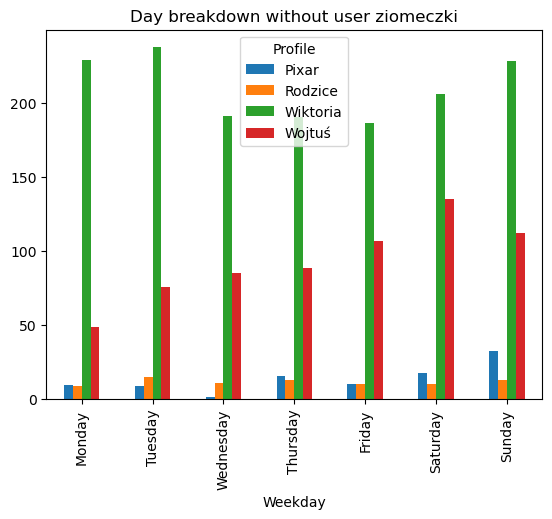

In [105]:
Day_duration_without_Ziomeczki.plot(kind = 'bar',title='Day breakdown without user ziomeczki')

Let’s return to the overall data and see how much time, on average, a user spent on Netflix when they were actively using the platform.

In [109]:
DF_with_date = Netflix_full_df
DF_with_date['Date'] = pd.to_datetime(DF_with_date['Start Time']).dt.date
DF_with_date.head()

,Profile,Start Time,Duration,Title,Type,Device,Year,Month,Weekday,Time,Hours,Date
0,Pixar,2024-06-23 20:42:54,0 days 00:01:05,New Amsterdam: Season 1_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Sunday,Evening,0.018056,2024-06-23
1,Pixar,2024-06-23 20:38:12,0 days 00:00:15,The Equalizer 2_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Sunday,Evening,0.004167,2024-06-23
2,Pixar,2024-06-23 20:09:14,0 days 00:01:18,The Equalizer - CLM 4,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Sunday,Evening,0.021667,2024-06-23
3,Pixar,2024-06-13 18:07:10,0 days 01:56:14,Bez litości 2,Video,Google Chromecast V5 Streaming Stick,2024,June,Thursday,Evening,1.937222,2024-06-13
4,Pixar,2024-06-13 18:05:31,0 days 00:00:46,The Equalizer 2_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Thursday,Evening,0.012778,2024-06-13


First, let’s aggregate the total time spent each day by date. Let’s also check how much time users spent on August 17th each year. This is the birthday of the user Wiktoria, and as you can see, this day is usually not spent on Netflix.

In [118]:
Day_sum_df = DF_with_date.groupby(['Date','Profile'])['Hours'].sum().unstack()
Day_sum_df = Day_sum_df.reset_index()
Day_sum_df['Date'] = pd.to_datetime(Day_sum_df['Date'])
Day_sum_df['Day'] = Day_sum_df['Date'].dt.strftime('%m-%d')
Day_sum_df[Day_sum_df['Day'] == '08-17']

C:\Users\stala\AppData\Local\Temp\ipykernel_31240\2222062386.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Day_sum_df = DF_with_date.groupby(['Date','Profile'])['Hours'].sum().unstack()


Profile,Date,Pixar,Rodzice,Wiktoria,Wojtuś,Ziomeczki :),Day
202,2020-08-17,0.000000,0.000000,0.000000,1.110556,0.009167,08-17
542,2021-08-17,0.000000,0.000000,0.000000,0.000000,6.795833,08-17
871,2022-08-17,0.000000,0.000000,0.000000,0.000000,0.523889,08-17
1184,2023-08-17,3.346667,0.089167,0.750556,2.257500,3.298333,08-17


June 18th is the wedding anniversary of the user Ziomeczki. Sometimes, they spend this day on Netflix.

In [122]:
Day_sum_df[Day_sum_df['Day'] == '06-18']

Profile,Date,Pixar,Rodzice,Wiktoria,Wojtuś,Ziomeczki :),Day
152,2020-06-18,0.0,0.0,0.000000,0.0,1.333611,06-18
490,2021-06-18,0.0,0.0,0.936389,0.0,7.395000,06-18
821,2022-06-18,0.0,0.0,1.473333,0.0,1.706944,06-18
1149,2023-06-18,0.0,0.0,0.000000,0.0,0.885000,06-18


Let's use function describe() to seek for some more details.

In [130]:
Day_sum_df.describe()

Profile,Date,Pixar,Rodzice,Wiktoria,Wojtuś,Ziomeczki :)
count,1417,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000
mean,2022-03-07 22:35:39.167254784,0.068149,0.058124,1.038188,0.460447,2.641436
min,2019-10-25 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-01-29 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022-02-03 00:00:00,0.000000,0.000000,0.000000,0.000000,1.505556
75%,2023-03-12 00:00:00,0.000000,0.000000,1.697500,0.029167,3.788333
max,2024-11-10 00:00:00,12.048611,4.824167,11.025000,7.551111,23.515556
std,NaN,0.558418,0.289383,1.574743,1.011540,3.514928


Let's check for the most active day based on hours spent for top 2 user, Ziomeczki and Wiktoria.

In [136]:
Day_sum_df[Day_sum_df['Ziomeczki :)'] == Day_sum_df['Ziomeczki :)'].max()]

Profile,Date,Pixar,Rodzice,Wiktoria,Wojtuś,Ziomeczki :),Day
321,2020-12-27,0.0,0.0,0.0,0.0,23.515556,12-27


In [138]:
Day_sum_df[Day_sum_df['Wiktoria'] == Day_sum_df['Wiktoria'].max()]

Profile,Date,Pixar,Rodzice,Wiktoria,Wojtuś,Ziomeczki :),Day
685,2022-01-11,0.0,0.0,11.025,0.0,11.754444,01-11


In [140]:
Netflix_daytime_split_df['Day'] = Netflix_daytime_split_df['Start Time'].dt.strftime('%m-%d')
Netflix_daytime_split_df.head()

,Profile,Start Time,Duration,Title,Type,Device,Year,Month,Weekday,Time,Hours,Date,Day
0,Pixar,2024-06-23 20:42:54,0 days 00:01:05,New Amsterdam: Season 1_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Sunday,Evening,0.018056,2024-06-23,06-23
1,Pixar,2024-06-23 20:38:12,0 days 00:00:15,The Equalizer 2_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Sunday,Evening,0.004167,2024-06-23,06-23
2,Pixar,2024-06-23 20:09:14,0 days 00:01:18,The Equalizer - CLM 4,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Sunday,Evening,0.021667,2024-06-23,06-23
3,Pixar,2024-06-13 18:07:10,0 days 01:56:14,Bez litości 2,Video,Google Chromecast V5 Streaming Stick,2024,June,Thursday,Evening,1.937222,2024-06-13,06-13
4,Pixar,2024-06-13 18:05:31,0 days 00:00:46,The Equalizer 2_hook_primary_16x9,Trailer,Apple iPhone 15 Pro iPhone,2024,June,Thursday,Evening,0.012778,2024-06-13,06-13


We can see that user Wiktoria has spent almost 12 hours on 11 of January in 2022, she watched polish tv series Wojenne Dziewczyny.

In [142]:
Wiktoria_max_df = Netflix_daytime_split_df[(Netflix_daytime_split_df['Day'] == '01-11') & (Netflix_daytime_split_df['Profile'] == 'Wiktoria') & 
(Netflix_daytime_split_df['Year'] == 2022)]

Wiktoria_max_df

,Profile,Start Time,Duration,Title,Type,Device,Year,Month,Weekday,Time,Hours,Date,Day
2745,Wiktoria,2022-01-11 22:02:07,0 days 00:42:08,Wojenne dziewczyny: Sezon 3: Odcinek 1 (Odcine...,Video,Sony CE Sony Android TV 2021 M5 Smart TV,2022,January,Tuesday,Evening,0.702222,2022-01-11,01-11
2746,Wiktoria,2022-01-11 20:40:22,0 days 00:41:12,Wojenne dziewczyny: Sezon 2: Odcinek 13 (Odcin...,Video,Sony CE Sony Android TV 2021 M5 Smart TV,2022,January,Tuesday,Evening,0.686667,2022-01-11,01-11
2747,Wiktoria,2022-01-11 20:02:09,0 days 00:38:11,Wojenne dziewczyny: Sezon 2: Odcinek 12 (Odcin...,Video,Sony CE Sony Android TV 2021 M5 Smart TV,2022,January,Tuesday,Evening,0.636389,2022-01-11,01-11
2748,Wiktoria,2022-01-11 19:21:32,0 days 00:39:25,Wojenne dziewczyny: Sezon 2: Odcinek 11 (Odcin...,Video,Sony CE Sony Android TV 2021 M5 Smart TV,2022,January,Tuesday,Evening,0.656944,2022-01-11,01-11
2749,Wiktoria,2022-01-11 18:38:21,0 days 00:38:43,Wojenne dziewczyny: Sezon 2: Odcinek 10 (Odcin...,Video,Sony CE Sony Android TV 2021 M5 Smart TV,2022,January,Tuesday,Evening,0.645278,2022-01-11,01-11
2750,Wiktoria,2022-01-11 17:58:00,0 days 00:40:19,Wojenne dziewczyny: Sezon 2: Odcinek 9 (Odcine...,Video,Sony CE Sony Android TV 2021 M5 Smart TV,2022,January,Tuesday,Afternoon,0.671944,2022-01-11,01-11
2751,Wiktoria,2022-01-11 17:16:48,0 days 00:41:11,Wojenne dziewczyny: Sezon 2: Odcinek 8 (Odcine...,Video,Sony CE Sony Android TV 2021 M5 Smart TV,2022,January,Tuesday,Afternoon,0.686389,2022-01-11,01-11
2752,Wiktoria,2022-01-11 15:46:47,0 days 00:38:22,Wojenne dziewczyny: Sezon 2: Odcinek 7 (Odcine...,Video,Sony CE Sony Android TV 2021 M5 Smart TV,2022,January,Tuesday,Afternoon,0.639444,2022-01-11,01-11
2753,Wiktoria,2022-01-11 15:18:32,0 days 00:28:12,Wojenne dziewczyny: Sezon 2: Odcinek 6 (Odcine...,Video,Sony CE Sony Android TV 2021 M5 Smart TV,2022,January,Tuesday,Afternoon,0.470000,2022-01-11,01-11
2754,Wiktoria,2022-01-11 15:06:45,0 days 00:11:35,Wojenne dziewczyny: Sezon 2: Odcinek 6 (Odcine...,Video,Sony CE Sony Android TV 2021 M5 Smart TV,2022,January,Tuesday,Afternoon,0.193056,2022-01-11,01-11


User Ziomeczki has spent the most time on 27 of December in 2020, watching bunch of different movies and series Queen's Gambit. The user reached a total of 23,5.

In [161]:
Ziomeczki_max_df = Netflix_daytime_split_df[(Netflix_daytime_split_df['Day'] == '12-27') & (Netflix_daytime_split_df['Profile'] == 'Ziomeczki :)') & 
(Netflix_daytime_split_df['Year'] == 2020)]
Ziomeczki_max_df

,Profile,Start Time,Duration,Title,Type,Device,Year,Month,Weekday,Time,Hours,Date,Day
12329,Ziomeczki :),2020-12-27 21:45:26,0 days 02:16:01,Igrzyska śmierci: W pierścieniu ognia,Video,TCL TV 2018 UHD Android TV Smart TV,2020,December,Sunday,Evening,2.266944,2020-12-27,12-27
12330,Ziomeczki :),2020-12-27 19:31:06,0 days 02:13:36,Igrzyska śmierci,Video,TCL TV 2018 UHD Android TV Smart TV,2020,December,Sunday,Evening,2.226667,2020-12-27,12-27
12331,Ziomeczki :),2020-12-27 19:29:43,0 days 00:00:06,Złoty kompas,Video,TCL TV 2018 UHD Android TV Smart TV,2020,December,Sunday,Evening,0.001667,2020-12-27,12-27
12332,Ziomeczki :),2020-12-27 19:28:50,0 days 00:00:05,Gun City,Video,TCL TV 2018 UHD Android TV Smart TV,2020,December,Sunday,Evening,0.001389,2020-12-27,12-27
12333,Ziomeczki :),2020-12-27 19:22:46,0 days 01:06:40,Gambit królowej: Miniserial: Gra końcowa (Odci...,Video,Samsung 2015 Hawk-M Smart TV,2020,December,Sunday,Evening,1.111111,2020-12-27,12-27
12334,Ziomeczki :),2020-12-27 18:14:47,0 days 01:07:29,Gambit królowej: Miniserial: Partie odłożone (...,Video,Samsung 2015 Hawk-M Smart TV,2020,December,Sunday,Evening,1.124722,2020-12-27,12-27
12335,Ziomeczki :),2020-12-27 18:01:48,0 days 01:24:07,Cisza,Video,TCL TV 2018 UHD Android TV Smart TV,2020,December,Sunday,Evening,1.401944,2020-12-27,12-27
12336,Ziomeczki :),2020-12-27 17:43:06,0 days 00:01:05,Cisza,Video,TCL TV 2018 UHD Android TV Smart TV,2020,December,Sunday,Afternoon,0.018056,2020-12-27,12-27
12337,Ziomeczki :),2020-12-27 17:42:28,0 days 00:00:09,Diabeł wcielony,Video,TCL TV 2018 UHD Android TV Smart TV,2020,December,Sunday,Afternoon,0.002500,2020-12-27,12-27
12338,Ziomeczki :),2020-12-27 17:41:26,0 days 00:00:10,Ranczo: Sezon 1: Odcinek 1 (Odcinek 1),Video,TCL TV 2018 UHD Android TV Smart TV,2020,December,Sunday,Afternoon,0.002778,2020-12-27,12-27


In [145]:
Day_sum_df.head()

Profile,Date,Pixar,Rodzice,Wiktoria,Wojtuś,Ziomeczki :),Day
0,2019-10-25,0.0,0.0,1.573333,0.0,0.0,10-25
1,2019-10-27,0.0,0.0,3.362500,0.0,0.0,10-27
2,2019-10-28,0.0,0.0,1.498889,0.0,0.0,10-28
3,2019-11-05,0.0,0.0,1.591667,0.0,0.0,11-05
4,2019-11-06,0.0,0.0,2.048611,0.0,0.0,11-06


Let's create a new DF, to calculate average time spent on Netflix.

In [148]:
Wiktoria_sum_df = Day_sum_df[['Date','Wiktoria']]
Wiktoria_sum_df = Wiktoria_sum_df[Wiktoria_sum_df['Wiktoria'] != 0 ]
Wiktoria_sum_df.rename(columns={'Wiktoria':'Hours spent'},inplace = True)
Wiktoria_sum_df.reset_index(inplace = True, drop = True)
Wiktoria_sum_df.head()

Profile,Date,Hours spent
0,2019-10-25,1.573333
1,2019-10-27,3.362500
2,2019-10-28,1.498889
3,2019-11-05,1.591667
4,2019-11-06,2.048611


We can see that user Wiktoria spends aproximetly 2 hours on Netflix when she decided to use it.

In [150]:
Wiktoria_sum_df.describe()

Profile,Date,Hours spent
count,698,698.000000
mean,2022-05-26 02:20:17.191976960,2.107612
min,2019-10-25 00:00:00,0.000278
25%,2021-02-18 06:00:00,0.979167
50%,2022-06-15 12:00:00,1.715694
75%,2023-08-08 18:00:00,2.711736
max,2024-11-10 00:00:00,11.025000
std,NaN,1.667554


In [152]:
Ziomeczki_sum_df = Day_sum_df[['Date','Ziomeczki :)']]
Ziomeczki_sum_df = Ziomeczki_sum_df[Ziomeczki_sum_df['Ziomeczki :)'] != 0 ]
Ziomeczki_sum_df.rename(columns={'Ziomeczki :)':'Hours spent'},inplace = True)
Ziomeczki_sum_df.reset_index(inplace = True, drop = True)
Ziomeczki_sum_df.head()

Profile,Date,Hours spent
0,2020-03-02,5.344167
1,2020-03-03,2.595556
2,2020-03-05,0.369167
3,2020-03-06,3.892778
4,2020-03-07,1.823611


We can see that user Ziomeczki spends aproximetly 4 hours on Netflix when she decided to use it.

In [154]:
Ziomeczki_sum_df.describe()

Profile,Date,Hours spent
count,927,927.000000
mean,2021-10-01 10:58:38.446602240,4.037664
min,2020-03-02 00:00:00,0.000278
25%,2020-12-25 12:00:00,1.557083
50%,2021-09-04 00:00:00,2.964722
75%,2022-07-08 12:00:00,5.350139
max,2024-02-17 00:00:00,23.515556
std,NaN,3.639880
